In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

from acquire import get_the_data
from prepare import prepare_the_data

### Use clustering to detect outliers

In [2]:
df = prepare_the_data(get_the_data())

In [3]:
df['times_accessed'] = 1

In [4]:
df = df[['times_accessed']].resample('w').sum()

In [5]:
df.head()

,times_accessed
timestamp,
2018-01-28,972
2018-02-04,4213
2018-02-11,3276
2018-02-18,2885
2018-02-25,3312


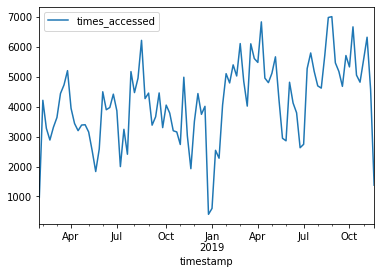

In [6]:
df.plot()

In [7]:
scaler = MinMaxScaler().fit(df)

In [8]:
np_array = scaler.transform(df)

In [9]:
np_array[0:10]

array([[0.08627214],
       [0.57681247],
       [0.43499319],
       [0.37581353],
       [0.44044196],
       [0.48993492],
       [0.61101862],
       [0.65445739],
       [0.7268049 ],
       [0.53655214]])

In [10]:
dbsc = DBSCAN(eps = .05, min_samples = 20).fit(df)

In [11]:
columns = list(df.columns)
scaled_columns = ["Scaled_" + column for column in columns]

In [12]:
original_df = df.copy()

In [13]:
scaled_df = pd.DataFrame(np_array, columns=scaled_columns)

In [14]:
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])

In [15]:
df.head()

,times_accessed,Scaled_times_accessed
0,972,0.086272
1,4213,0.576812
2,3276,0.434993
3,2885,0.375814
4,3312,0.440442


In [16]:
labels = dbsc.labels_
labels[0:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [17]:
df['labels'] = labels
df.labels.value_counts()

-1    96
Name: labels, dtype: int64